# <font color = "Red"> Using LE-NET Deep Network to classify Traffic Signs</font> <font color = "DarkGreen"> *By Harshit Dawar*

## <font color = "brown"> About LE-NET Deep Network

It is someewhat similar to Convolutional Neural Networks(CNN), but the difference is that in Le-Net networks we have input first, on which we apply convolutional layer, than downsampling, and this is repeated until we want to stop and the end we have fully connected layer followed by the output.

## <font color = "brown"> Information about Dataset

- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}




## <font color = "Brown"> Importing Required Libraries and Dataset

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pickle          # For serialization of data.
from sklearn.utils import shuffle    # For shuffling the dataset.
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix

In [14]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
# Here validation dataset is used to avoid overfitting of the model, and promote generalization. It also helps to 
# assess the progress of the network during training.

# Note: Please unzip the file of training data to use it.
with open("./traffic_signs_data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic_signs_data/valid.p", mode='rb') as validation_data:
    validation = pickle.load(validation_data)
with open("./traffic_signs_data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [15]:
train.keys(), valid.keys(), test.keys()

(dict_keys(['coords', 'labels', 'features', 'sizes']),
 dict_keys(['coords', 'labels', 'features', 'sizes']),
 dict_keys(['sizes', 'coords', 'features', 'labels']))

## <font color = "Brown"> Dividing the Dataset into Training and Testing

In [25]:
x_train, y_train = train["features"], train["labels"]
x_validation, y_validation = validation["features"], validation["labels"]
x_test, y_test = test["features"], test["labels"]

In [26]:
# Output means that there are 34799 images of size 32x32 having 3 channels(RGB).
x_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [28]:
x_validation.shape, y_validation.shape

((4410, 32, 32, 3), (4410,))

In [29]:
x_test.shape, y_test.shape

((12630, 32, 32, 3), (12630,))

## <font color = "Brown"> Visualzing Dataset

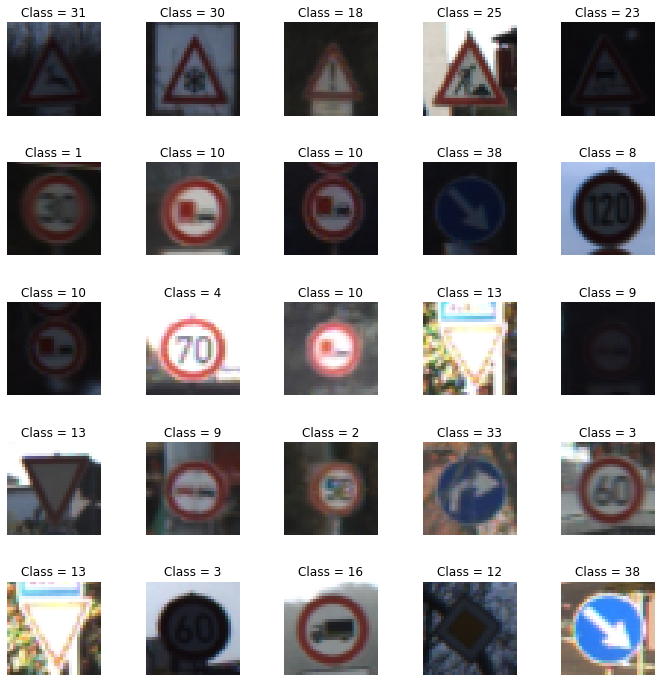

In [58]:
#Visualizing Training Data

fig, axes = plt.subplots(5, 5, figsize = (12, 12))
axes = axes.ravel()
for i in range(25):
    r = random.randint(1,34799)
    axes[i].imshow(x_train[r])
    axes[i].set_title("Class = {}".format(y_train[r]))
    axes[i].axis("off")
plt.subplots_adjust(hspace = 0.5)

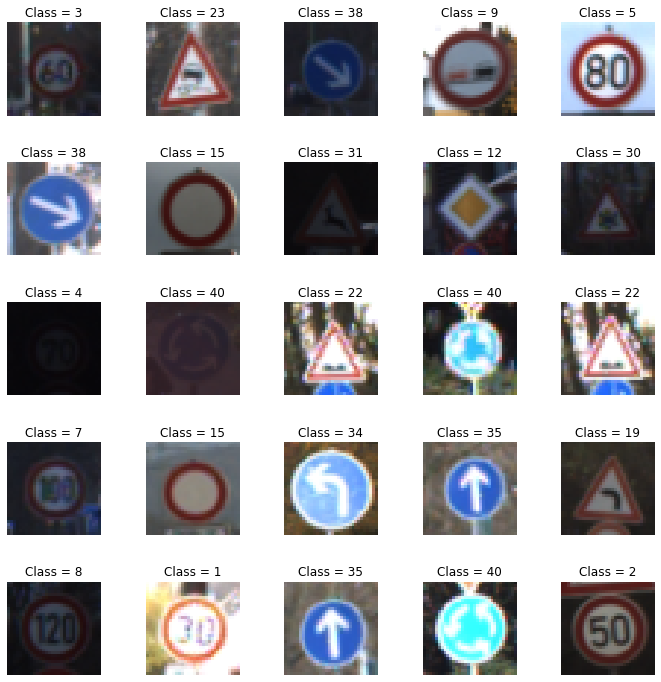

In [59]:
#Visualizing Validation Data

fig, axes = plt.subplots(5, 5, figsize = (12, 12))
axes = axes.ravel()
for i in range(25):
    r = random.randint(1,4410)
    axes[i].imshow(x_validation[r])
    axes[i].set_title("Class = {}".format(y_validation[r]))
    axes[i].axis("off")
plt.subplots_adjust(hspace = 0.5)

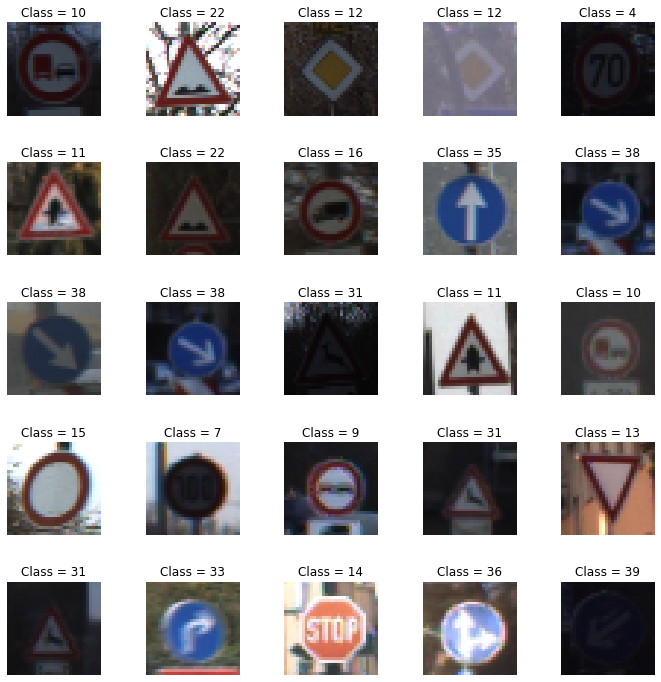

In [69]:
#Visualizing Testing Data

fig, axes = plt.subplots(5, 5, figsize = (12, 12))
axes = axes.ravel()
for i in range(25):
    r = random.randint(1,12630)
    axes[i].imshow(x_test[r])
    axes[i].set_title("Class = {}".format(y_test[r]))
    axes[i].axis("off")
plt.subplots_adjust(hspace = 0.5)

## <font color = "Brown"> Preparing Data

In [76]:
# Shuffling Data
x_train_shuffled, y_train_shuffled = shuffle(x_train, y_train)

In [95]:
# Converting RGB to grayscale for handling only 1 channel instead of 3.

x_train_shuffled_gray    = np.sum(x_train_shuffled/3, axis = 3, keepdims = True )
x_test_gray              = np.sum(x_test/3, axis = 3, keepdims = True )
x_validation_gray        = np.sum(x_validation/3, axis = 3, keepdims = True )

In [96]:
x_train_shuffled_gray.shape, x_test_gray.shape, x_validation_gray.shape

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1))

In [98]:
x_train_shuffled_gray_normalised = (x_train_shuffled_gray - 128)/128
x_test_gray_normalised = (x_test_gray - 128)/128
x_validation_gray_normalised = (x_validation_gray - 128)/128

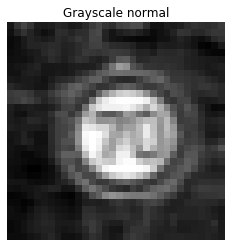

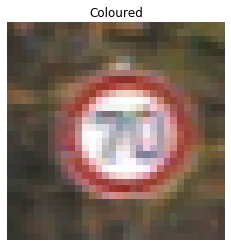

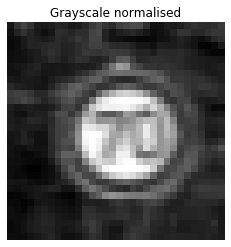

In [106]:
# Visualizing the Training Data
plt.axis("off")
plt.imshow(x_train_shuffled_gray[5500].squeeze(), cmap = "gray")
plt.title("Grayscale normal")
plt.show()
plt.axis("off")
plt.imshow(x_train_shuffled[5500])
plt.title("Coloured")
plt.show()
plt.axis("off")
plt.imshow(x_train_shuffled_gray_normalised[5500].squeeze(), cmap = "gray")
plt.title("Grayscale normalised")
plt.show()

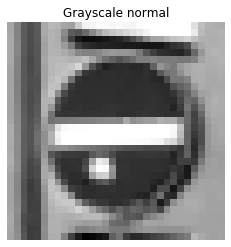

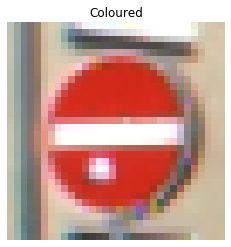

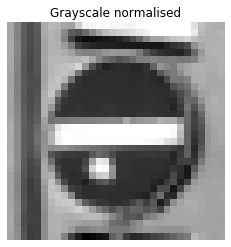

In [107]:
# Visualizing the Testing Data
plt.axis("off")
plt.imshow(x_test_gray[5500].squeeze(), cmap = "gray")
plt.title("Grayscale normal")
plt.show()
plt.axis("off")
plt.imshow(x_test[5500])
plt.title("Coloured")
plt.show()
plt.axis("off")
plt.imshow(x_test_gray_normalised[5500].squeeze(), cmap = "gray")
plt.title("Grayscale normalised")
plt.show()

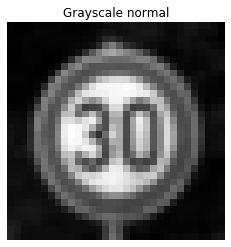

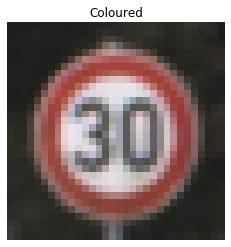

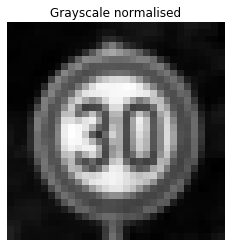

In [109]:
# Visualizing the Validation Data
plt.axis("off")
plt.imshow(x_validation_gray[500].squeeze(), cmap = "gray")
plt.title("Grayscale normal")
plt.show()
plt.axis("off")
plt.imshow(x_validation[500])
plt.title("Coloured")
plt.show()
plt.axis("off")
plt.imshow(x_validation_gray_normalised[500].squeeze(), cmap = "gray")
plt.title("Grayscale normalised")
plt.show()

## <font color = "brown"> Facts about the Model

The model consists of the following layers: 

Important Points: 
- Here the output from the first layer will act as input to the second layer.
- After pooling/downsampling, the output dimension becomes half of the input dimension.
- At Last we have output layer of 43 neurons, because 43 classes in our dataset, and it is very important for these two, to be equal.


Steps in the model are as follows:
- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

## <font color = "brown"> Creating and Training the Model

In [117]:
le_net_model = Sequential()

le_net_model.add(Conv2D(filters = 6, kernel_size = (5,5), activation = "relu", input_shape = (32,32,1)))
le_net_model.add(AveragePooling2D())

le_net_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = "relu"))
le_net_model.add(AveragePooling2D())

le_net_model.add(Flatten())

le_net_model.add(Dense(units = 120, activation = "relu"))

le_net_model.add(Dense(units = 84, activation = "relu"))

le_net_model.add(Dense(units = 43, activation = "softmax"))


In [118]:
le_net_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_5 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_6 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_8 (Dense)              (None, 84)                10164     
__________

In [119]:
le_net_model.compile(loss = "sparse_categorical_crossentropy",
                     optimizer = Adam(lr = 0.001),
                     metrics = ["accuracy"])

In [122]:
history = le_net_model.fit(x_train_shuffled_gray_normalised,
                y_train_shuffled,
                batch_size = 500,
                epochs = 50,
                verbose = 1,
                validation_data = (x_validation_gray_normalised, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 14s 414us/step - loss: 0.1536 - acc: 0.9632 - val_loss: 0.5251 - val_acc: 0.8558
Epoch 2/50
34799/34799 [==============================] - 16s 461us/step - loss: 0.1430 - acc: 0.9651 - val_loss: 0.5467 - val_acc: 0.8610
Epoch 3/50
34799/34799 [==============================] - 12s 346us/step - loss: 0.1279 - acc: 0.9696 - val_loss: 0.5301 - val_acc: 0.8599
Epoch 4/50
34799/34799 [==============================] - 10s 299us/step - loss: 0.1215 - acc: 0.9705 - val_loss: 0.5377 - val_acc: 0.8660
Epoch 5/50
34799/34799 [==============================] - 10s 297us/step - loss: 0.1106 - acc: 0.9745 - val_loss: 0.5594 - val_acc: 0.8655
Epoch 6/50
34799/34799 [==============================] - 10s 295us/step - loss: 0.1008 - acc: 0.9767 - val_loss: 0.5918 - val_acc: 0.8605
Epoch 7/50
34799/34799 [==============================] - 12s 350us/step - loss: 0.0934 - acc: 0.9785 - val_loss: 0.5

## <font color = "brown"> Testing/Evaluating the Model

In [128]:
score = le_net_model.evaluate(x_test_gray_normalised, y_test)
print("Model Testing Accuracy = ", score[1])

12630/12630 [==============================] - 2s 147us/step
Model Testing Accuracy =  0.8797307997021709


In [131]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [132]:
accuracy = history.history["acc"]
validation_accuracy = history.history["val_acc"]
loss_accuracy = history.history["loss"]
validation_loss_accuracy = history.history["val_acc"]

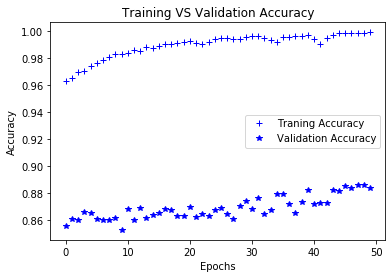

In [154]:
plt.plot( accuracy, "b+", label = "Traning Accuracy")
plt.plot( validation_accuracy, "b*", label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training VS Validation Accuracy")
plt.legend()
plt.show()

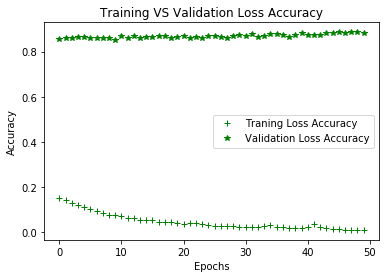

In [157]:
plt.plot( loss_accuracy, "g+", label = "Traning Loss Accuracy")
plt.plot( validation_loss_accuracy, "g*", label = "Validation Loss Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training VS Validation Loss Accuracy")
plt.legend()
plt.show()

In [159]:
predicted_classes = le_net_model.predict_classes(x_test_gray_normalised)
y_actual_truth = y_test

In [161]:
cm = confusion_matrix(predicted_classes, y_actual_truth)

In [163]:
cm.shape

(43, 43)

## <font color = "brown"> Visualising The Model

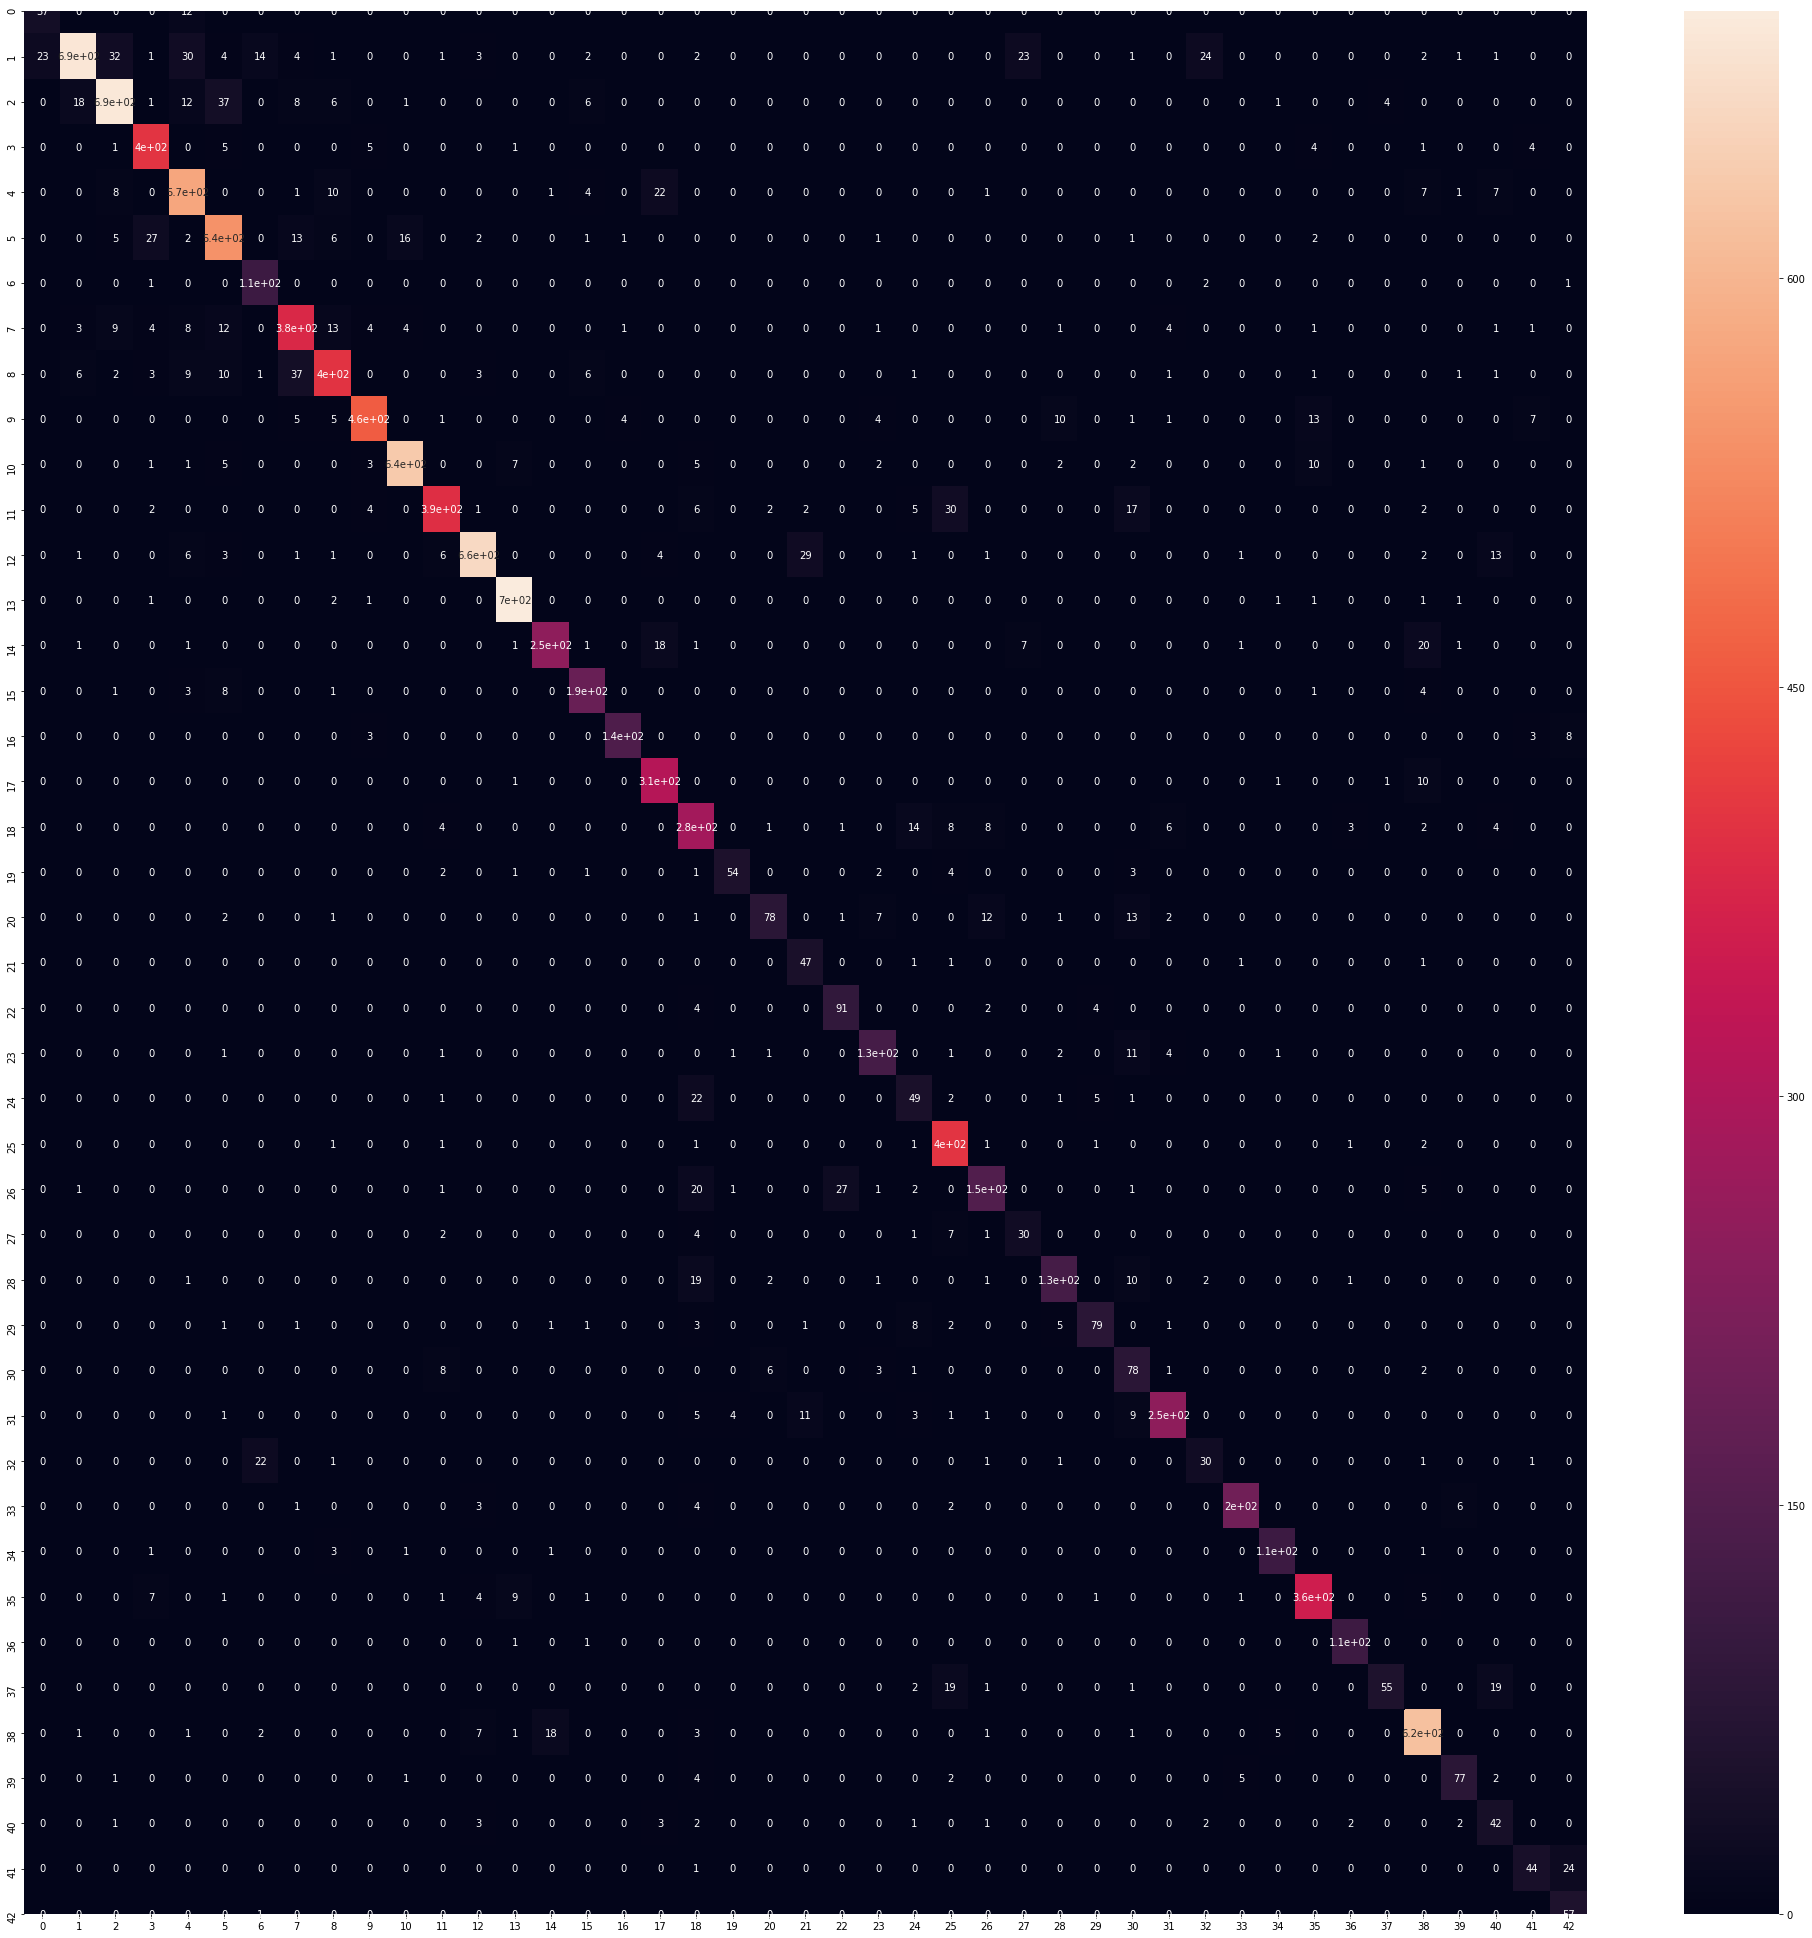

In [172]:
plt.figure(figsize = (35,35))
sns.heatmap(cm, annot = True)
plt.show()

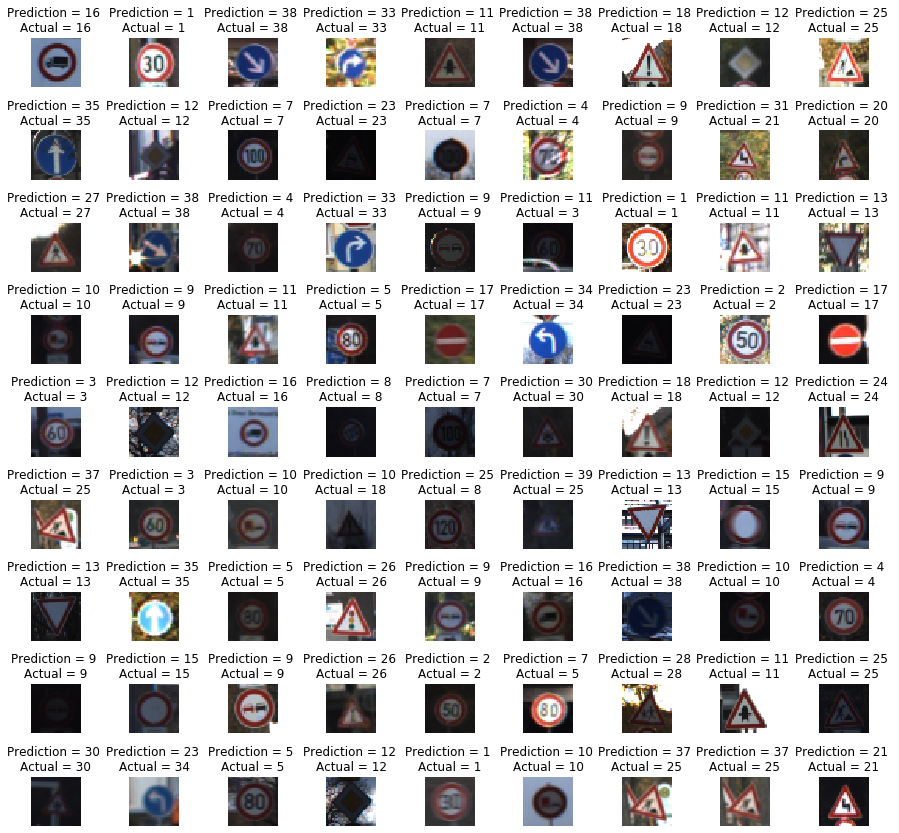

In [184]:
L = 9
W = 9

fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].axis("off")
    axes[i].set_title("Prediction = {} \nActual = {}".format(predicted_classes[i], y_test[i]))
plt.subplots_adjust(wspace = 1)